< 8. [Visualisation de données](04-visualisation.ipynb) | [Contents](index.ipynb) | 10. [Analyse spatiale](10-analyse-spatiale.ipynb) >

In [1]:
%pylab
%matplotlib inline
import pandas as pd
from scipy.cluster.hierarchy import dendrogram
import sklearn
from sklearn import datasets, tree
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

from pandas.plotting import scatter_matrix

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
iris = datasets.load_iris()
# jeu de donnees cars
cars = pd.read_csv('donnees/cars.txt')
# jeu de donnees auto
autos = pd.read_csv('donnees/autos.txt', delimiter='\t')
numericAutos = autos[['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 
       'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']]
scaledX = scale(numericAutos.to_numpy())

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       38 non-null     object 
 1   Car           38 non-null     object 
 2   MPG           38 non-null     float64
 3   Weight        38 non-null     float64
 4   Drive_Ratio   38 non-null     float64
 5   Horsepower    38 non-null     int64  
 6   Displacement  38 non-null     int64  
 7   Cylinders     38 non-null     int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.5+ KB


In [4]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  205 non-null    float64
 1   make               205 non-null    object 
 2   fuel-type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num-of-doors       205 non-null    object 
 5   body-style         205 non-null    object 
 6   drive-wheels       205 non-null    object 
 7   engine-location    205 non-null    object 
 8   wheel-base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb-weight        205 non-null    float64
 13  engine-type        205 non-null    object 
 14  num-of-cylinders   205 non-null    object 
 15  engine-size        205 non-null    float64
 16  fuel-system        205 non

In [5]:
def plotClusters(K, labels, data, xname, yname):
    figure()
    for i in range(K):
        scatter(data.loc[labels==i, xname], data.loc[labels==i, yname], 
                label = 'groupe {}'.format(i))
    legend()
    xlabel(xname)
    ylabel(yname)
    
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Méthodes de segmentation
## Algorithme des k-moyennes

* page du module scikit-learn http://scikit-learn.org/stable/modules/clustering.html#k-means

In [6]:
K = 3
kmeans = KMeans(n_clusters=K).fit(scaledX)
for i in range(3):
    print('--------\nGroupe {}\n--------'.format(i+1))
    print(numericAutos[kmeans.labels_==i].describe())
    #print('centre du groupe {} ({} observations): {}'.format(i, sum(kmeans.labels_==i), c))

--------
Groupe 1
--------
       wheel-base      length      width     height  curb-weight  engine-size  \
count   83.000000   83.000000  83.000000  83.000000    83.000000    83.000000   
mean    98.046988  176.178313  66.030120  53.078313  2629.084337   132.578313   
std      3.668566    5.510567   0.918075   2.417066   254.043937    27.537611   
min     88.600000  168.800000  64.100000  48.800000  2190.000000    70.000000   
25%     96.200000  172.400000  65.400000  51.600000  2404.000000   114.500000   
50%     98.400000  175.600000  66.100000  53.100000  2551.000000   122.000000   
75%    100.400000  177.800000  66.500000  54.900000  2814.500000   148.500000   
max    104.900000  188.800000  68.300000  59.800000  3151.000000   194.000000   

            bore     stroke  compression-ratio  horsepower     peak-rpm  \
count  83.000000  83.000000          83.000000   83.000000    83.000000   
mean    3.430723   3.267349           8.739880  118.994217  5141.575181   
std     0.224052  

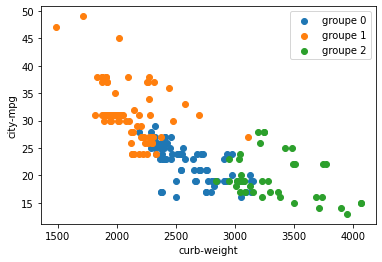

In [7]:
plotClusters(K, kmeans.labels_, autos, 'curb-weight', 'city-mpg')

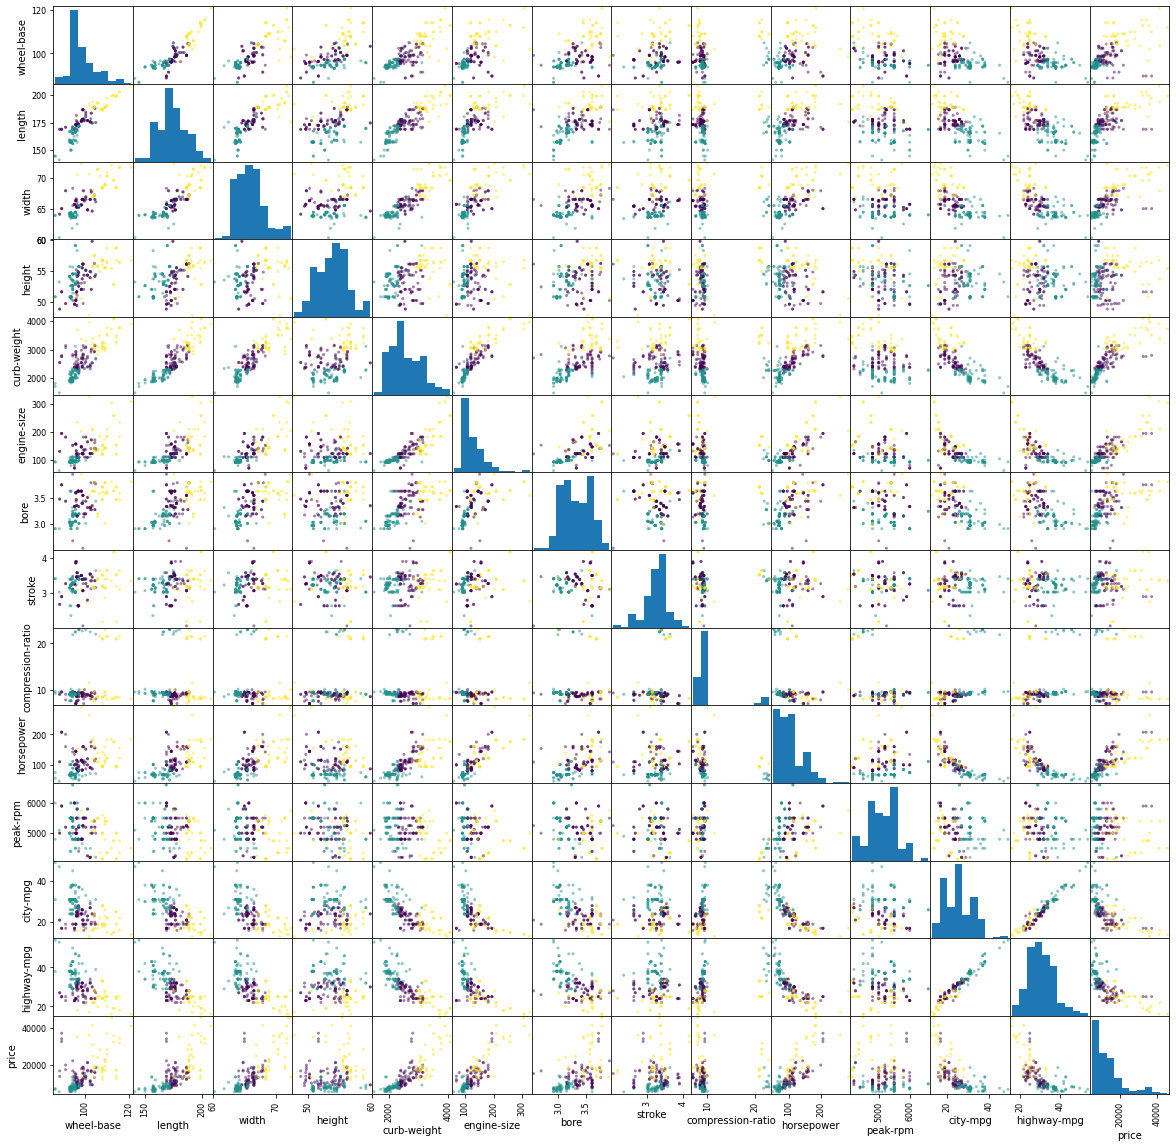

In [8]:
_=scatter_matrix(numericAutos, figsize=(20,20), c = kmeans.labels_)

## Méthodes de classification hiérarchique ascendante
* page du module scikit-learn http://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

In [9]:
from sklearn.cluster import AgglomerativeClustering
K = 3
hac = AgglomerativeClustering(n_clusters=K, linkage = "complete").fit(scaledX)
for i in range(3):
    print('--------\nGroupe {}\n--------'.format(i+1))
    print(numericAutos[hac.labels_==i].describe())

--------
Groupe 1
--------
       wheel-base      length      width     height  curb-weight  engine-size  \
count   28.000000   28.000000  28.000000  28.000000    28.000000    28.000000   
mean   104.885714  187.525000  69.078571  54.017857  3407.321429   202.321429   
std      9.251655   12.121228   2.066910   3.205904   385.129228    49.736382   
min     89.500000  168.900000  65.000000  47.800000  2756.000000   145.000000   
25%     97.950000  177.800000  67.900000  51.400000  3182.500000   173.750000   
50%    107.900000  188.900000  68.650000  55.150000  3405.000000   188.500000   
75%    112.250000  198.900000  70.525000  56.550000  3721.250000   215.250000   
max    120.900000  208.100000  72.300000  58.700000  4066.000000   326.000000   

            bore     stroke  compression-ratio  horsepower     peak-rpm  \
count  28.000000  28.000000          28.000000   28.000000    28.000000   
mean    3.621429   3.373571          13.289286  160.107143  4882.142857   
std     0.181490  

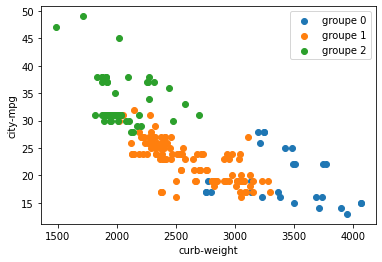

In [10]:
plotClusters(K, hac.labels_, autos, 'curb-weight', 'city-mpg')

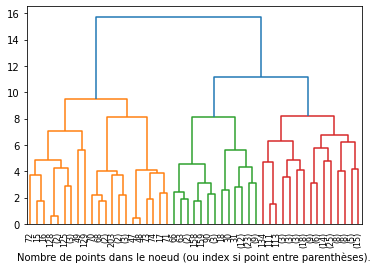

In [11]:
hac = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage = "complete").fit(scaledX)
plot_dendrogram(hac, truncate_mode='level', p=5)
_=plt.xlabel("Nombre de points dans le noeud (ou index si point entre parenthèses).")

# Méthodes supervisées
## Méthodes de classification

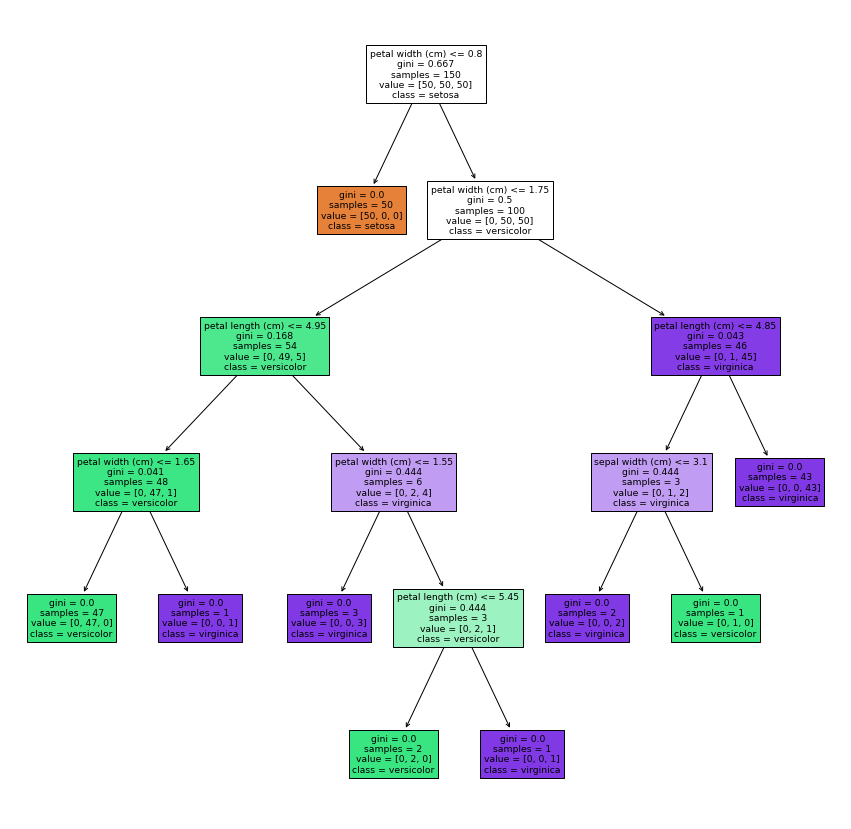

In [12]:
clf = tree.DecisionTreeClassifier()
result = clf.fit(iris.data, iris.target)
plt.figure(figsize=(15,15))
_ = tree.plot_tree(result, filled=True, feature_names = iris.feature_names, class_names = iris.target_names)

In [13]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
print(tree.export_text(result, feature_names = iris.feature_names))

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



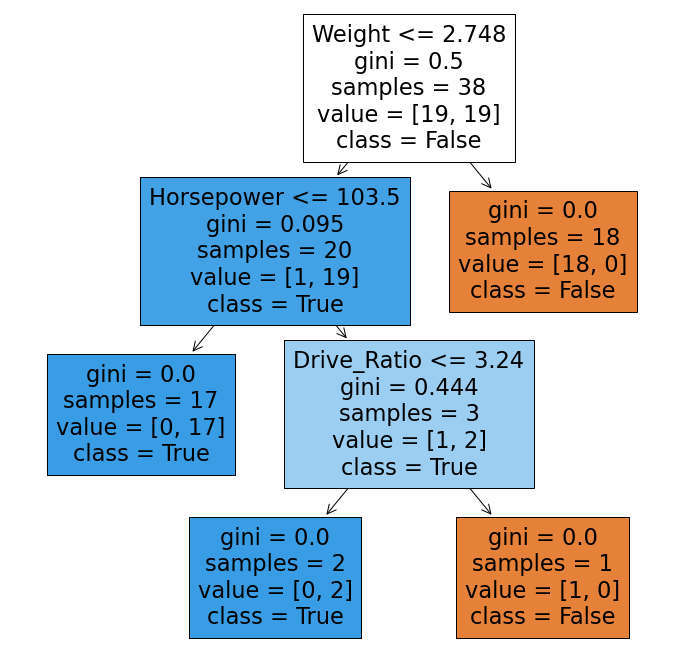

In [15]:
cars['MPG0'] = cars['MPG']>cars['MPG'].median()
clf = tree.DecisionTreeClassifier()
featureNames = ['Weight', 'Drive_Ratio', 'Horsepower', 'Displacement', 'Cylinders']
className = 'MPG0'
result = clf.fit(cars[featureNames], cars[className])
plt.figure(figsize=(12,12))
_ = tree.plot_tree(result, filled=True, feature_names = featureNames, 
                   class_names = [str(x) for x in cars[className].unique()])

In [16]:
print(tree.export_text(result, feature_names = featureNames))

|--- Weight <= 2.75
|   |--- Horsepower <= 103.50
|   |   |--- class: True
|   |--- Horsepower >  103.50
|   |   |--- Drive_Ratio <= 3.24
|   |   |   |--- class: True
|   |   |--- Drive_Ratio >  3.24
|   |   |   |--- class: False
|--- Weight >  2.75
|   |--- class: False

